# $\textbf{The mysteries of the universe (Computational assignment 1)}$

### $\textbf{By Sondre Dahl and Anthony Schøyen}$

In [175]:
#Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [176]:
#Some constants

v_d = 35
Delta = 5
m = 0.149
S0 = 4.1e-4
v_hw = -10
v_tw = 10
g = 9.81

def B_over_m(v):
    return (0.0039 + 0.0059/(1 + np.exp((v-v_d)/Delta)))

def v_total(vx,vy,vz):
    return np.sqrt(vx**2 + vy**2 + vz**2)



# $\textbf{Part One: Baseball!}$

### $\textbf{Task 1a: Find greatest distance and optimal angle}$

In [177]:
#Function which finds the distance with given initial angle, velocity and wind
def findTheD(v, theta0, dt, v_w):
    x = 0
    y = 0
    
    #Find initial velocity in x and y direction
    vx = v*np.cos(theta0)
    vy = v*np.sin(theta0)
    
    while(y >=0):
        #Implement the equations of motion
        x += vx * dt
        y += vy * dt
        v_tot = v_total(vx,vy,0)
        B = B_over_m(v_tot)
        vx -= B * abs(v_tot-v_w) * (vx - v_w) * dt
        vy -= g * dt + B * abs(v_tot-v_w) * vy * dt
    
    return x,y

print(findTheD(50, np.pi/6, 0.001, 10))

(151.63785790299272, -0.00714962884941563)


In [178]:
#goes through all angles for given inital velocity and finds greatest distance
def useTheD(v, wind):
    angle = np.linspace(0,np.pi/2, 91)
    l = []
    for i in range(91):
        l.append(findTheD(v, angle[i], 0.01, wind)[0])
    return l[np.argmax(l)], np.argmax(l)

D1, A1 = useTheD(50, 0)
D2, A2 = useTheD(50, v_hw)
D3, A3 = useTheD(50, v_tw)

print(f'No Wind: Distance = {D1} m, Angle = {A1}°')
print(f'Headwind: Distance = {D2} m, Angle = {A2}°')
print(f'Tailwind: Distance = {D3} m, Angle = {A3}°')

No Wind: Distance = 123.15832826276787 m, Angle = 35°
Headwind: Distance = 89.79512334575375 m, Angle = 28°
Tailwind: Distance = 162.00466956918387 m, Angle = 42°


Above we have found the maximum range of batted baseball with corresponding angle when $v_0 = 50m/s$. It is obviously no surprise that the ball will travel the farthest with the help of some tailwind, and that headwind will do the opposite. We cannot necessarily say that these angles are optimal for all initial velocities.

In [179]:
#Find angles and velocity in order to hit a homerun. Warning: slow code ahead
def findTheV(wind):
    v = 50
    while True:
        d, a = useTheD(v, wind)
        if (d > 168):
            return d, a, v #We brake the loop when a homerun is reached
        v += 1

In [180]:
D1, A1, V1 = findTheV(0)
D2, A2, V2 = findTheV(v_hw)
D3, A3, V3 = findTheV(v_tw)

print(f'No Wind: Distance = {D1} m, Angle = {A1}°, Velocity: {V1} m/s')
print(f'Headwind: Distance = {D2} m, Angle = {A2}°, Velocity: {V2} m/s')
print(f'Tailwind: Distance = {D3} m, Angle = {A3}°, Velocity: {V3} m/s')

No Wind: Distance = 170.93623110393636 m, Angle = 33°, Velocity: 63 m/s
Headwind: Distance = 169.15097124489847 m, Angle = 23°, Velocity: 79 m/s
Tailwind: Distance = 171.48662929285092 m, Angle = 41°, Velocity: 52 m/s


The required initial speed is 52 m/s and 79 m/s for tailwind and headwind respectivly. Without wind you will need a speed of 63 m/s. 

### $\textbf{Task 1b: The ball rotates!}$

In [181]:
#New func where the equations of motion have been updated. 
#We can now add rotation to the ball. The observant reader will see that this code is not generic at all...
def findTheCurvedD(v, dt, rev):
    x = 0
    y = 1.8
    z = 0
    
    vx = v
    vy = 0
    vz = 0
    
    w = 2 * np.pi * rev #Angular velocity
    
    x_list = [x]
    z_list = [z]
    
    while(y >=0):
        x += vx * dt
        y += vy * dt
        z += vz * dt
        v_tot = v_total(vx,vy,vz)
        B = B_over_m(v_tot)
        vz -= S0 * w * vx * dt
        vx -= B * v_tot * vx * dt
        vy -= g * dt
        
        x_list.append(x)
        z_list.append(z)
    return x_list, z_list

Difference in deflection: 0.4875097233152741 m


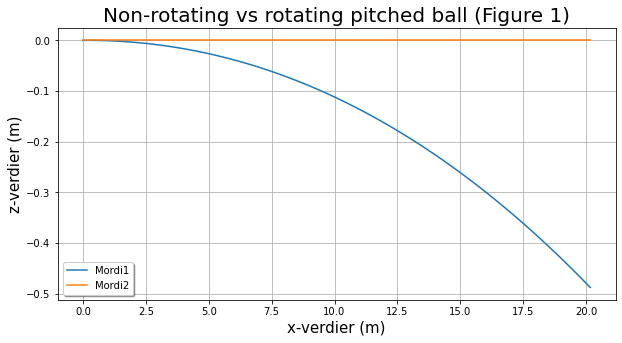

In [182]:
x1,z1 = findTheCurvedD(35, 0.01, 30)
x2,z2 = findTheCurvedD(35, 0.01, 0)

print(f'Difference in deflection: {z2[-1]-z1[-1]} m')

plt.figure(figsize=(10, 5))
plt.title("Non-rotating vs rotating pitched ball (Figure 1)", fontsize=20)
plt.plot(x1, z1,'-',label='Mordi1')
plt.plot(x2, z2,'-',label='Mordi2')
plt.xlabel('x-verdier (m)', fontsize = 15)
plt.ylabel('z-verdier (m)', fontsize = 15)
plt.legend(fancybox = True, shadow= True)
plt.grid()
plt.show()

$\textbf{Figure 1}$ shows how the ball gets deflected in the negative z-direction when we add rotation to the problem. Surprising? Not at all! The rotation around the y-axis will cause a Magnus-force deflecting the ball and therefore making it harder for the hitter to get a good hit as the trajectory is more unpredictable. 

### $\textbf{1c: The legendary Nuckle ball}$

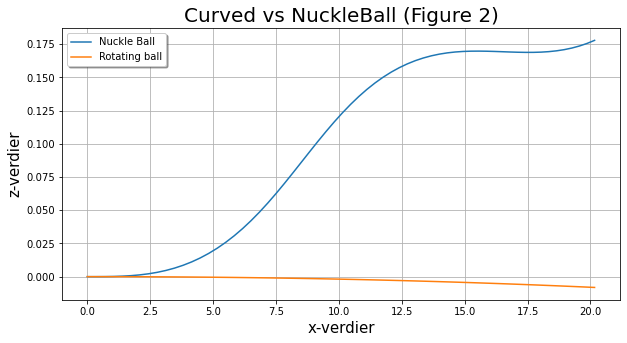

In [183]:
#Function which calculates the lateral force
def F_lateral(theta):
    return 0.5  *(np.sin(4 * theta) - 0.25 * np.sin(8 * theta) + 0.08 * np.sin(12 * theta) - 0.025 * np.sin(16 * theta))


#Again, code is not generic
def findTheKnuckleD(v, theta, dt,  rev):
    
    x = 0
    y = 1.8
    z = 0
    vx = v
    vy = 0
    vz = 0
    w = 2 * np.pi * rev
    
    x_list = [x]
    z_list = [z]
    F_lst = [0]
    
    while(y >=0):
        x += vx * dt
        y += vy * dt
        z += vz * dt
        v_tot = v_total(vx,vy,vz)
        B = B_over_m(v_tot)
        theta += w * dt
        vz +=  g * F_lateral(theta) * dt  - S0 * w * vx * dt
        vx -= B * v_tot * vx * dt
        vy -= g * dt
        
        x_list.append(x)
        z_list.append(z)
        F_lst.append(F_lateral(theta))
    return x_list, z_list, F_lst

x1, z1, F = findTheKnuckleD(35, 0, 0.01, 0.5)
x2, z2 = findTheCurvedD(35, 0.01, 0.5)

plt.figure(figsize=(10, 5))
plt.title("Curved vs NuckleBall (Figure 2)", fontsize = 20)
plt.plot(x1, z1,'-',label='Nuckle Ball')
plt.plot(x2, z2,'-',label='Rotating ball')
plt.xlabel('x-verdier', fontsize = 15)
plt.ylabel('z-verdier', fontsize = 15)
plt.legend(fancybox = True, shadow = True)
plt.grid()
plt.show()

No wonder the heading of this subsection is "The legendary nuckleball". Only by applying an angular velocity of $rev = 0.5 s^{-1}$, the nuckleball moves in a quite unpredictable manner ($\textbf{Figure 2}$). In comparison, this angular velocity will have minimal effect on a ball without stitches. In $\textbf{Figure 3}$ one can see the lateral force $F_{drag}$ plotted as a function of distance $x$. One clearly sees that this force varies periodically, and therefore makes life miserable for the hitter. 

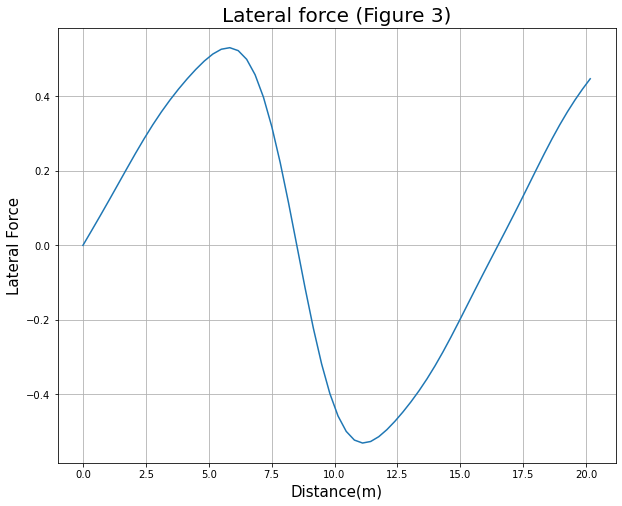

In [184]:
plt.figure(figsize=(10, 8))
plt.plot(x1, F)
plt.title("Lateral force (Figure 3)", fontsize=20)
plt.xlabel("Distance(m)", fontsize=15)
plt.ylabel("Lateral Force", fontsize=15)
plt.grid()
plt.show()

We will now experiment with different values for initial angular orientation $\theta_0$, angular velocity $\omega$ and initial velocity $v$. Enjoy!

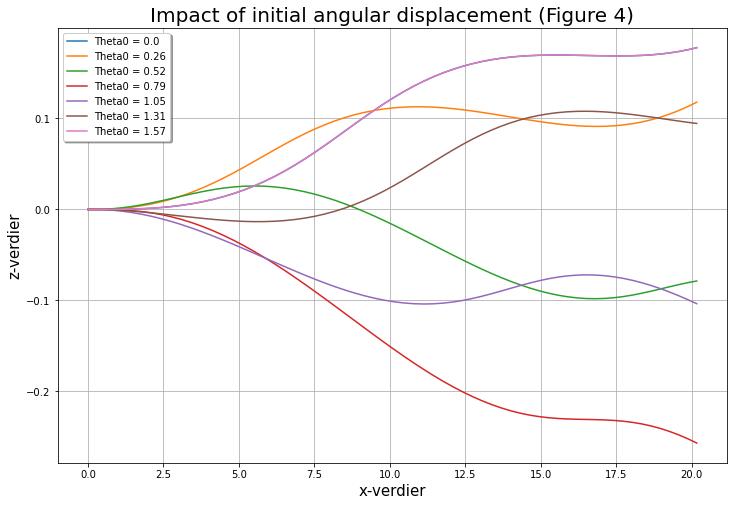

In [185]:
l = np.linspace(0,np.pi/2,7)

plt.figure(figsize=(12, 8))
plt.title("Impact of initial angular displacement (Figure 4)", fontsize=20)
for i in range(len(l)):
    xi,zi, F = findTheKnuckleD(35, l[i], 0.01, 0.5)
    plt.plot(xi, zi,'-',label='Theta0 = {}'.format(round(l[i],2)))
plt.xlabel('x-verdier', fontsize = 15)
plt.ylabel('z-verdier', fontsize = 15)
plt.grid(1)
plt.legend(fancybox = True, shadow = True)
plt.show()

Wow. This nuckleball really makes life difficult for the hitter, as $\textbf{Figure 4}$ clearly shows. We have here set $rev=0.5s^{-1}$ and $v=35m/s$, and are witnessing quite unpredictable behaviour. How could the hitter know the initial orientation of the ball? It is also quite hard to see a correlation between the initial angle of orientation and the following path of the ball. No wonder these problems have fascinated physicists for decades. However, it is also quite important to adress the fact that throwing a ball with these kinds of angular velocities is very difficult, and relies on a skilled pitcher.  

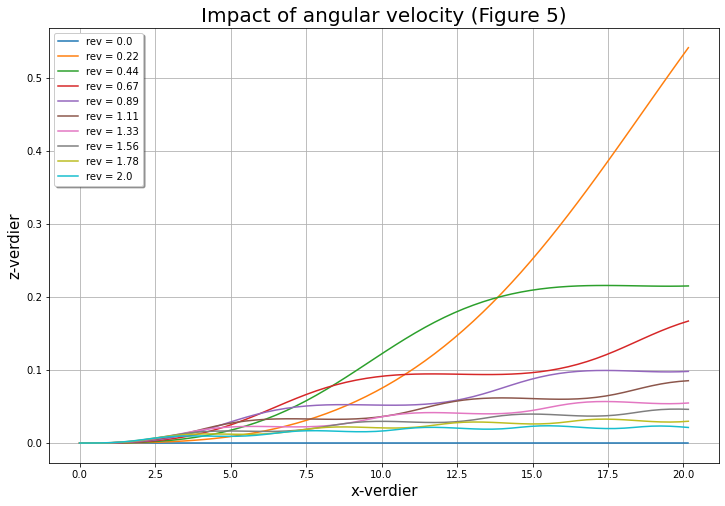

In [186]:
l = np.linspace(0,2,10)


plt.figure(figsize=(12, 8))
plt.title("Impact of angular velocity (Figure 5)", fontsize = 20)
for i in range(len(l)):
    xi,zi, F = findTheKnuckleD(35, 0, 0.01, l[i])
    plt.plot(xi, zi,'-',label='rev = {}'.format(round(l[i],2)))
plt.xlabel('x-verdier', fontsize = 15)
plt.ylabel('z-verdier', fontsize = 15)
plt.grid(1)
plt.legend(fancybox = True, shadow = True)
plt.show()

As $\textbf{Figure 5}$ shows, we have now moved our attention to the role of the angular velocity $\omega$. From the figure, it it quite obvious that greater displacement in z-direction is correlated with a smaller value for the angular velocity. If we increase the angular velocity beyond $rev = 2.0s^{-1}$, we will soon see that the net displacement moves onto the negative z-axis. Now the magnusforce caused by the angular velocity will be more prominent, and for high angular velocities the problem will start to look more like the one we examined in **1b**. 

Before we leave the nuckleball behind for good, we will of course examine the role of the initial velocity $v_0$. Well, the force due to the stiches is not velocity-dependent, so the fact that we see similar dispacements in the z-direction in $\textbf{Figure 6}$ for all velocities is not surprising. However, the magusforce is dependent of the velocity $v_x$, and exerts a force in the negative z-direction. This explains why the displacement decreases slightly for higher velocities.  

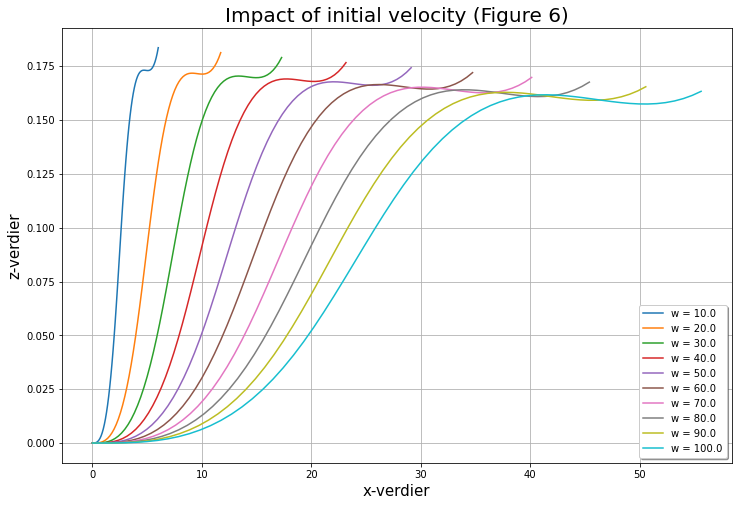

In [187]:
v = np.linspace(10,100,10)

plt.figure(figsize=(12, 8))
plt.title("Impact of initial velocity (Figure 6)", fontsize=20)
for i in range(len(v)):
    xi,zi, F = findTheKnuckleD(v[i], 0, 0.01, 0.5)
    plt.plot(xi, zi,'-',label='w = {}'.format(round(v[i],2)))
plt.xlabel('x-verdier', fontsize = 15)
plt.ylabel('z-verdier', fontsize = 15)
plt.grid(1)
plt.legend(fancybox = True, shadow = True) #Fancybox and shadow is of course obligatory on all numerical projects...
plt.show()

# $\textbf{Part 2: Golf !}$

We now move our attention to a sport which in my opinion is a little less exiting. I have always been more fond of sports which demand endurance, and golf demands more endurance to watch than to play as i see it. However, I had a similar attitude towards baseball before this project, so I am fully prepared to change my mind. 

### $\textbf{Task 2a, backspin}$

We will in this first part examine how top and backspinn influences the trajectory of a golfball. 

In [190]:
S0 = 0.25 ### S0:= S0w/m
m = 46/1000
p = 1.225
r = 2/100

def DragQueen(v, o):
    if (v <= 14 or o == 1): ### o is a parameter to check if we want to use the drag of the golf ball or a regular ball
        return -1/2 * p * np.pi * r**2 * v**2
    return -7/v * p * np.pi * r**2 * v**2

def GolferudAllé(v, dt, spin = True, theta0 =  9 * np.pi/180, o = 0):
    rev = 0
    if spin:
        rev = 1 #We choose rev = 1 for all following tasks which includes spin. 
    x = 0
    y = 0
    
    vx = v*np.cos(theta0)
    vy = v*np.sin(theta0)
    w = 2 * np.pi * rev
    
    x_list = [x]
    y_list = [y]
    
    while(y >= 0):
        x += vx * dt
        y += vy * dt
        
        v_tot = v_total(vx, vy, 0)        
        Fd = DragQueen(v_tot, o)
        a = np.arctan2(vy, vx)
        
        vx += ( Fd * np.cos(a)/m - S0 * vy * rev) * dt
        vy += ( Fd * np.sin(a)/m + S0 * vx * rev - g) * dt
        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

The assignment text states that $\frac{S_0 \omega}{m} \approx 0.25 \frac{1}{s}$ is a good approximation. Our physical understanding completely contradict this horrible estimate and we will ignore it completely. It doesn't make sense that the Magnus Force is a boolean force. 

We will assume that the estimation works fine for a single value of $\omega$. Halving the angular veloctiy will halve the force (as it should!!). As the observant reader can see, we have created a boolian input-parameter for revolutions per time (rev). As a consequence, rev can only take the values 1 or 0 (spin vs no spin). 

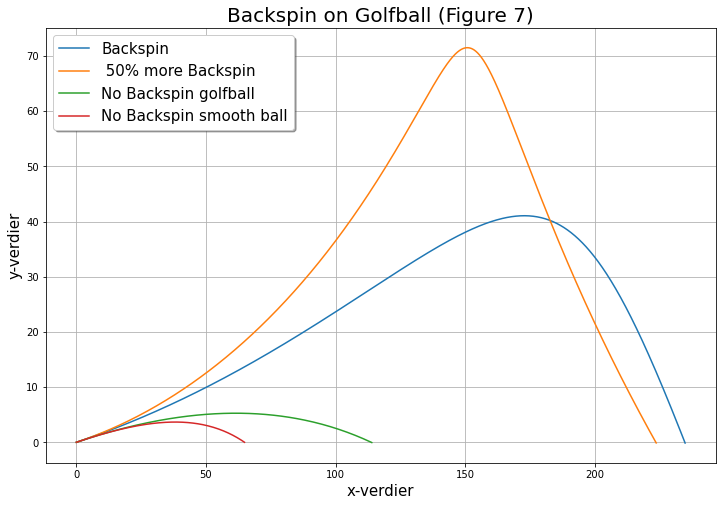

In [191]:

plt.figure(figsize=(12, 8))
plt.title("Backspin on Golfball (Figure 7)", fontsize = 20)
xi, yi = GolferudAllé(70, 0.01)
plt.plot(xi, yi,'-',label='Backspin')

S0 *= 1.5
xi, yi = GolferudAllé(70, 0.01)
plt.plot(xi, yi,'-',label=' 50% more Backspin ')

S0 *= (2 / 3)

xi, yi = GolferudAllé(70, 0.01, False)
plt.plot(xi, yi,'-',label='No Backspin golfball')

xi, yi = GolferudAllé(70, 0.01, False, o = 1)
plt.plot(xi, yi,'-',label='No Backspin smooth ball')

plt.xlabel('x-verdier', fontsize = 15)
plt.ylabel('y-verdier', fontsize = 15)
plt.grid()
plt.legend(fancybox = True, shadow = True, fontsize = 15)
plt.show()

In $\textbf{Figure 7}$ we have plotted golf strokes, visualizing how the surface and spin of the ball influences its trajectory. The figure clearly shows how backspin can do "magic" to a golfstroke, helping you reach new hights at the driving range. As expected, the shape of the golf ball will reduce drag, and make it go further. Adding backspin to the problem will exert a force in the positive y-direction. As seen from the blue curve, the magnus force can even overpower the gravitational force. This curve is convex until the ball reaches a distance around 120 meters, which means that is has a positive second derivative in this region.  

### $\textbf{2b: Golf in 3D!}$

The Equations of motion will almost be similar, just that we have an extra Magnus effect force from the spin around the $x$- axis.

For convinience when plotting, we will swap the $y$ and $z$-axis. 

In our 2D example we had to deal some angles to determine the direction of some forces. Since two angles would be a "Goat-Hell", we have decided to use cross product to determine the coordinate contribution. Now to keep it smooth, we will also convert all meassurements to vectors. This might have been a good idea from the start but whatever. 

The general Magnus force is given by $F_M = S_0 \vec\omega \times \vec v$. We have a contribution from the $\vec \omega_x$ and the $\vec \omega_y$ the total Magnus force is $S_0 \vec\omega_x \times \vec v + S_0 \vec\omega_y \times \vec v = S_0 (\vec \omega_x + \vec \omega_y) \times \vec v$. 

Our input value for spin will be amount of $\omega^*$ in around each axis. 

In [192]:
def vectorDragQueen(v):
    A = np.pi * r**2
    C = 14/np.linalg.norm(v)
    u = v/np.linalg.norm(v)
    if (np.linalg.norm(v) <= 14):
        C = 1/2 
    return - C * p * A * np.linalg.norm(v)**2 *u

def GolferudAllé_FINAL_BOSS(v_value, dt, sx, sy, theta0 =  9 * np.pi/180):
    x = np.array([[0],[0],[0]], dtype = float)
    v = np.array([[v_value*np.cos(theta0)],[0],[v_value*np.sin(theta0)]])
    x_info = np.array([[0],[0],[0]], dtype = float)
    spinvec = np.array([[sx],[sy],[0]], dtype = float) / 4
    vecg = np.array([[0],[0],[-g]], dtype = float)
    while(x[2, 0] >=0):
        Fd = vectorDragQueen(v)
        x += v * dt
        v += (Fd / m + S0 * (np.cross(spinvec.T, v.T).T + vecg)) * dt
        x_info = np.concatenate((x_info, x), axis = 1)
    return x_info

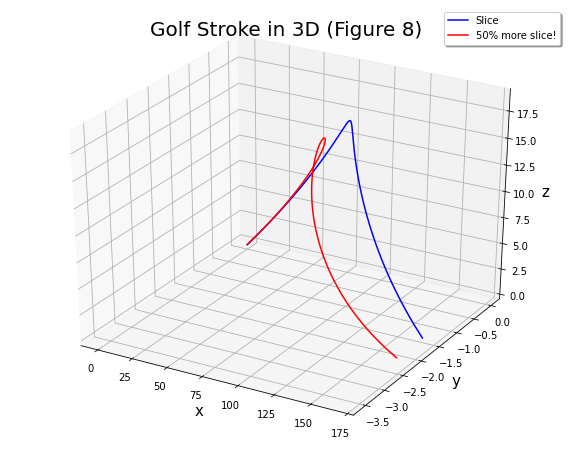

In [193]:
X = GolferudAllé_FINAL_BOSS(70, 0.01, 1, -1)
Y = GolferudAllé_FINAL_BOSS(70, 0.01, 3/2, -1)


plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.set_title("Golf Stroke in 3D (Figure 8)", fontsize = 20)

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('z', fontsize = 15)

ax.plot3D(X[0,:], X[1,:], X[2,:], 'blue', label = 'Slice')
ax.plot3D(Y[0,:], Y[1,:], Y[2,:], 'red', label = '50% more slice!')
plt.legend(fancybox = True, shadow = True, fontsize = 10)
plt.show()

The intial trajectories seems to align quite well, but as the ball curves down the dissimularities shows. These plots shows how experienced golf players, as ourselves, can manipulate ball spin to maximize their winning chance!